In [17]:
#Importing The Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Importing the training set
dataset_train = pd.read_csv('../datasets/Stock_Price_Train.csv')

In [19]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [20]:
train = dataset_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]], shape=(1258, 1))

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]], shape=(1258, 1))

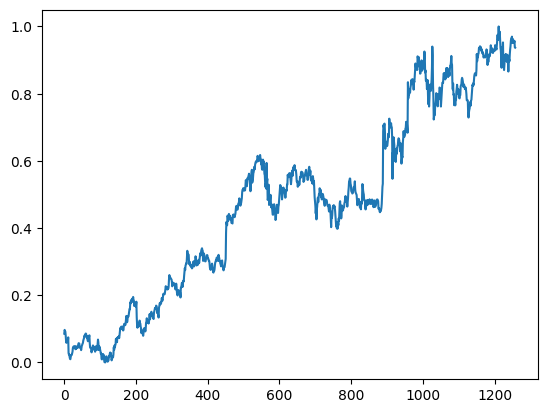

In [22]:
plt.plot(train_scaled)
plt.show()

In [23]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
        0.05065481],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
        0.05214302],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
        0.05612397],
       ...,
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.96569685, 0.97510976, 0.95966962, ..., 0.95163331, 0.95725128,
        0.93796041]], shape=(1208, 50))

In [24]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146], shape=(1208,))

In [25]:
#ımporting the Keras Libraries and packages
from keras .models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialising the RNN
regressor = Sequential()

# Adding the first RNN Layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second RNN Layer and some dropout regularisation
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third RNN Layer and some dropout regularisation
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN Layer and some dropout regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

#Adding the output Layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss= 'mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=250, batch_size= 32)


Epoch 1/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3466
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1937
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1682
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1072
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1010
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0699
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0510
Epoch 8/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0463
Epoch 9/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0420
Epoch 10/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0367
Epoch 11/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0318
Epoch 12/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0279
Epoch 13/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0218
Epoch 14/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0215
Epoch 15/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - lo

In [26]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('../datasets/Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
real_stock_price = dataset_test.loc[:,['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [28]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


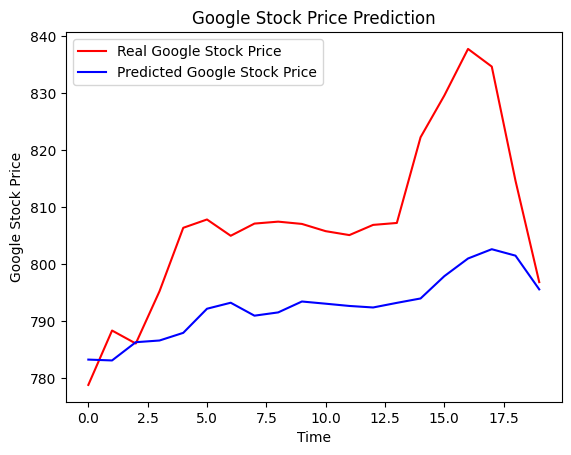

In [29]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [30]:
#LSTM
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [32]:
data = pd.read_csv('../datasets/international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


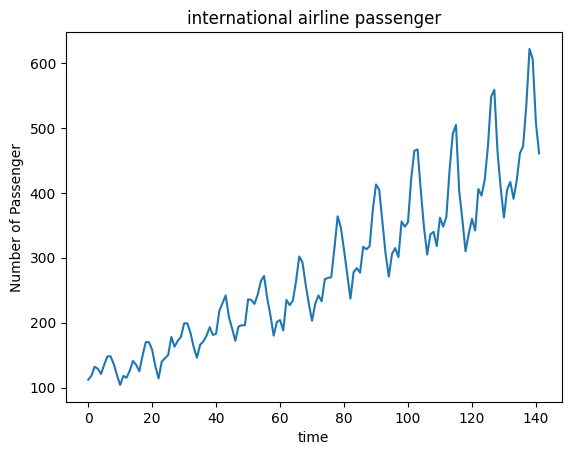

In [33]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [65]:
#preprocessing
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [66]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [67]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


In [68]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [69]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [70]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [71]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 0.0136 
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0044
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0041   
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.0040
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0037   
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0036
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0035
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.0034
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0033   
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.0032
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0031
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0030   
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0029
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0028
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 76

In [72]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train Score: 0.04 RMSE
Test Score: 0.10 RMSE


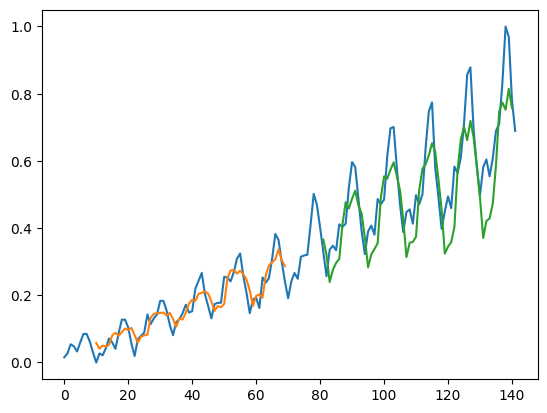

In [73]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()